In [1]:
import pymongo
import xarray_mongodb
import bson
import datetime

# datetime.datetime.utcnow()

In [2]:
mongoClient = pymongo.MongoClient()
mongoDB = mongoClient.testDB
mongoCollection = mongoDB.testCollection

In [3]:
from time import sleep
from multiprocessing.pool import ThreadPool
 
# task executed in a worker thread
def task():
    # report a message
    print(f'Task executing\n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task done\n')
    
def task2():
    # report a message
    print(f'Task2 executing \n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task2 done\n')
 
# protect the entry point
if __name__ == '__main__':
    # create and configure the thread pool
    pool = ThreadPool()
    # issue tasks to the thread pool
    pool.apply_async(task)
    pool.apply_async(task2)
    # close the thread pool
    pool.close()
    # wait for all tasks to finish
    pool.join()

Task executing

Task2 executing 

Task2 done

Task done



# Import supporting package

In [4]:
import xarray as xr
import pandas as pd
import numpy as np
import copy

import glob

import xrft
import finufft

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time, read_csv_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FFTAnalyser import fft, ifft, fft_nutou
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

# Import supporting package

In [5]:
import xarray as xr
import numpy as np

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

import matplotlib.pyplot as plt

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FitAnalyser import NewFitModel
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

## Start a client for parallel computing

In [6]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=10, processes=True, memory_limit='10GB')
client

<Client: 'tcp://127.0.0.1:58048' processes=6 threads=60, memory=55.88 GiB>

## Set global path for experiment

In [7]:
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/03/0043/*.h5"
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/2023-04-18_0003_Evaporative_Cooling_000.h5"

# filepath = "//DyLabNAS/Data/Repetition_scan/2023/04/21/0002/*.h5"

# filepath = r"./testData/0002/*.h5"

# filepath = r"./testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5"

# filepath = r'd:/Jianshun Gao/Simulations/analyseScripts/testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5'

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/*.h5"

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/04/0000/*.h5"

filepath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

In [8]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_1",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_2",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_3",
}


In [9]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + '2023/05/23'# get_date()

# An example for one experimental run

## Load the data

In [10]:
shotNum = "0069"
filePath = folderPath + "/" + shotNum + "/*.h5"
# filePath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/12/0065/*.h5"
filePath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0] # range(len(groupList))
}

dataSet = dataSetDict["camera_1"]
dataSet = swap_xy(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

dataSet

f:\Jianshun\analyseScript\DataContainer\ReadData.py:178: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not key in datesetOfGlobal.scanAxis


<xarray.Dataset>
Dimensions:     (y: 1200, x: 1920)
Dimensions without coordinates: y, x
Data variables:
    atoms       (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    background  (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    dark        (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    shotNum     <U2 '08'
    OD          (y, x) float64 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
Attributes: (12/96)
    TOF_free:                          0.02
    abs_img_freq:                      110.858
    absorption_imaging_flag:           True
    backup_data:                       True
    blink_off_time:                    nan
    blink_on_time:                     nan
    ...                                ...
    y_offset:                          0
    y_offset_img:                      0
    z_offset:                          0.189
    z_offset_img:                      0.189
    scanAxis:                          []
    scanAxisLength:                    []

In [11]:
list(dataSet.data_vars)

['atoms', 'background', 'dark', 'shotNum', 'OD']

In [32]:
dataSet.OD.attrs

{'IMAGE_SUBCLASS': 'IMAGE_GRAYSCALE',
 'IMAGE_VERSION': '1.2',
 'IMAGE_WHITE_IS_ZERO': 0,
 'x_start': 810,
 'x_end': 1110,
 'y_end': 1025,
 'y_start': 725,
 'x_center': 960,
 'y_center': 875,
 'x_span': 300,
 'y_span': 300}

## Calculate an plot OD images

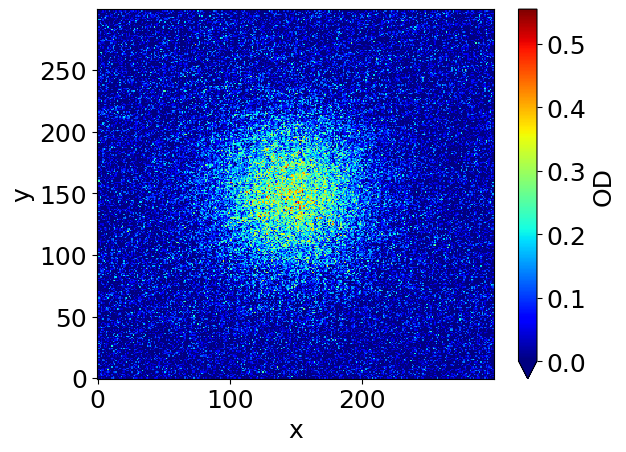

In [13]:
# imageAnalyser.center = (960, 1040)
# imageAnalyser.span = (100, 100)
# imageAnalyser.fraction = (0.1, 0.1)

imageAnalyser.center = (960, 875)
imageAnalyser.span = (300, 300)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])
plt.show()

## Do a 2D two-peak gaussian fit to the OD images

### Do the fit

In [14]:
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, polylog2_2d

fitModel = DensityProfileBEC2dModel()
# fitModel = ThomasFermi2dModel()

fitAnalyser = FitAnalyser(fitModel, fitDim=2)

# fitAnalyser = FitAnalyser("Gaussian-2D", fitDim=2)

# dataSet_cropOD = dataSet_cropOD.chunk((1,1,100,100))

params = fitAnalyser.guess(dataSet_cropOD, guess_kwargs=dict(pureBECThreshold=0.3), dask="parallelized")
fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

f:\Jianshun\analyseScript\Analyser\FitAnalyser.py:84: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/(sigmax))**2 - ((y-centery)/(sigmay))**2)**(3 / 2)


In [15]:
params.compute().item()

Parameters([('BEC_amplitude', <Parameter 'BEC_amplitude', value=0, bounds=[0:inf]>), ('thermal_amplitude', <Parameter 'thermal_amplitude', value=3073.528205527723, bounds=[0:inf]>), ('BEC_centerx', <Parameter 'BEC_centerx', value=146.94301032591366, bounds=[-inf:inf]>), ('BEC_centery', <Parameter 'BEC_centery', value=147.47224593536436, bounds=[-inf:inf]>), ('thermal_centerx', <Parameter 'thermal_centerx', value=120.55703835420424, bounds=[-inf:inf]>), ('thermal_centery', <Parameter 'thermal_centery', value=179.3646237177809, bounds=[-inf:inf]>), ('BEC_sigmax', <Parameter 'BEC_sigmax', value=17.155488681677085, bounds=[0:inf]>), ('BEC_sigmay', <Parameter 'BEC_sigmay', value=18.315601451967396, bounds=[0:inf]>), ('thermal_sigmax', <Parameter 'thermal_sigmax', value=71.84654400127174, bounds=[0:inf]>), ('thermal_sigmay', <Parameter 'thermal_sigmay', value=86.21585280152608, bounds=[-inf:inf], expr='thermalAspectRatio * thermal_sigmax'>), ('thermalAspectRatio', <Parameter 'thermalAspectRatio', value=1.2, bounds=[0.8:1.2]>), ('condensate_fraction', <Parameter 'condensate_fraction', value=0.0, bounds=[-inf:inf], expr='BEC_amplitude / (BEC_amplitude + thermal_amplitude)'>)])

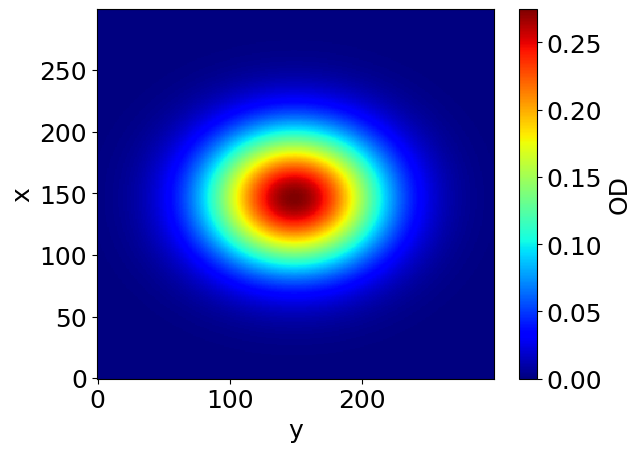

In [16]:
fitCurve = fitAnalyser.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [17]:
fitModel2 = Polylog22dModel(prefix='thermal_')
fitAnalyser2 = FitAnalyser(fitModel2, fitDim=2)
fitCurve2 = fitAnalyser2.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

fitModel3 = ThomasFermi2dModel(prefix='BEC_')
fitAnalyser3 = FitAnalyser(fitModel3, fitDim=2)
fitCurve3 = fitAnalyser3.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

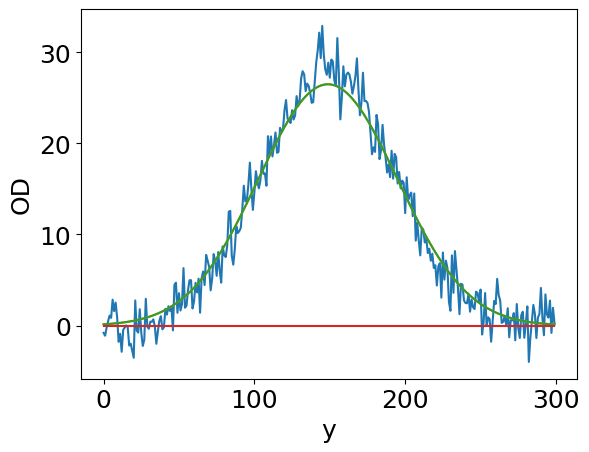

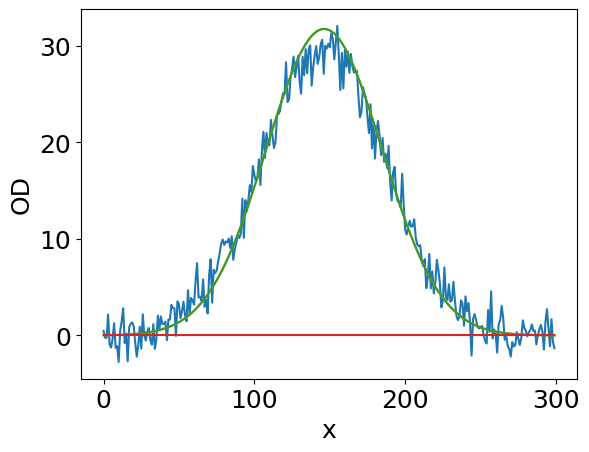

In [18]:
fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [19]:
value = fitAnalyser.get_fit_value(fitResult)
std = fitAnalyser.get_fit_std(fitResult)

In [20]:
fitResult.item()

In [21]:
value

<xarray.Dataset>
Dimensions:              ()
Data variables:
    BEC_amplitude        float64 0.0
    thermal_amplitude    float64 3.067e+03
    BEC_centerx          float64 146.9
    BEC_centery          float64 147.5
    thermal_centerx      float64 146.2
    thermal_centery      float64 148.8
    BEC_sigmax           float64 17.16
    BEC_sigmay           float64 18.32
    thermal_sigmax       float64 54.37
    thermal_sigmay       float64 65.25
    thermalAspectRatio   float64 1.2
    condensate_fraction  float64 0.0

# upload data to MongoDB

In [22]:
xdb = xarray_mongodb.XarrayMongoDB(mongoDB)

In [23]:
value = fitAnalyser.get_fit_value(fitResult)
value

<xarray.Dataset>
Dimensions:              ()
Data variables:
    BEC_amplitude        float64 0.0
    thermal_amplitude    float64 3.067e+03
    BEC_centerx          float64 146.9
    BEC_centery          float64 147.5
    thermal_centerx      float64 146.2
    thermal_centery      float64 148.8
    BEC_sigmax           float64 17.16
    BEC_sigmay           float64 18.32
    thermal_sigmax       float64 54.37
    thermal_sigmay       float64 65.25
    thermalAspectRatio   float64 1.2
    condensate_fraction  float64 0.0

In [24]:
dataSet_cropOD

<xarray.DataArray 'OD' (y: 300, x: 300)>
array([[-0.06868947, -0.04667641, -0.03211941, ...,  0.01331776,
        -0.01568196, -0.01466019],
       [-0.04738689, -0.10095033, -0.04738689, ..., -0.00086687,
        -0.02864644,  0.04425356],
       [ 0.01488149,  0.02990479,  0.02943848, ...,  0.08614451,
        -0.04168887, -0.17522026],
       ...,
       [-0.04435198, -0.08981436, -0.12101118, ..., -0.03211941,
        -0.10466366, -0.00086687],
       [-0.10622739, -0.16213502, -0.04253957, ..., -0.03117222,
         0.01331776, -0.03117222],
       [-0.02148616, -0.06029029,  0.17348652, ...,  0.04109733,
        -0.07082546, -0.01590475]])
Dimensions without coordinates: y, x

In [25]:
dataSet_cropOD.attrs['name'] = 'name'

In [26]:
_id, _ = xdb.put(dataSet_cropOD)

In [27]:
_id

ObjectId('647a1a3961605df9de73b6d7')

In [28]:
# _id = '646e3cbbdb91e17db4b4cbd2'

In [29]:
xdb.get(_id)

<xarray.DataArray 'OD' (y: 300, x: 300)>
array([[-0.06868947, -0.04667641, -0.03211941, ...,  0.01331776,
        -0.01568196, -0.01466019],
       [-0.04738689, -0.10095033, -0.04738689, ..., -0.00086687,
        -0.02864644,  0.04425356],
       [ 0.01488149,  0.02990479,  0.02943848, ...,  0.08614451,
        -0.04168887, -0.17522026],
       ...,
       [-0.04435198, -0.08981436, -0.12101118, ..., -0.03211941,
        -0.10466366, -0.00086687],
       [-0.10622739, -0.16213502, -0.04253957, ..., -0.03117222,
         0.01331776, -0.03117222],
       [-0.02148616, -0.06029029,  0.17348652, ...,  0.04109733,
        -0.07082546, -0.01590475]])
Dimensions without coordinates: y, x
Attributes:
    name:     name

In [30]:
c = bson.objectid.ObjectId('646e4919802812f029b385d7')
c

ObjectId('646e4919802812f029b385d7')

In [31]:
xdb.get(c)

DocumentNotFoundError: 646e4919802812f029b385d7

In [ ]:
import datetime
post = {"author": "Mike",
        "data_id": _id,
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

In [ ]:
posts = mongoCollection
post_id = posts.insert_one(post).inserted_id
post_id

In [ ]:
 for i in posts.find({'_id': bson.objectid.ObjectId('646e45a4802812f029b385d6')}):
     print(i)

In [ ]:
import gridfs

fs = gridfs.GridFS(mongoDB, 'xarray')

In [ ]:
fs.put(b"hello world")

In [ ]:
c = bson.objectid.ObjectId('646e4919802812f029b385d7')

fs.get(_id)

In [ ]:
np.sqrt(np.sum([0.061**2, 0.334**2, 0.447**2]))